# Introduction

Dans ce notebook, nous allons analyser les données du Titanic. L'objectif est de comprendre les facteurs qui ont pu influencer la survie des passagers. Tout au long de ce rapport, nous nous poserons des questions pertinentes et essayerons d'y repondre avec du code et de la visualisation de données.

Le plan de notre analyse est le suivant:

* Import des différentes librairies de Python

* Import et bref aperçu de nos données

* Nettoyage et Transformation de nos données

* Analyse univarié des colonnes ou attributs les plus important

* Analyse bivariée des colonnes afin d'identifier les caractéristiques ayant une influence sur la survie

# Import des librairies de Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Import et Bref aperçu de nos données

In [ ]:
# Montage du disque google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
dossier = '/gdrive/My Drive/DataKev/data/'

In [ ]:
titanic = pd.read_csv(dossier + 'train.csv')

In [ ]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.00,NaN,S
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.75,NaN,Q
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,C 7076,7.25,NaN,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* On remarque déjà que 38% des passagers ont survécu.
* Les Variables `Survived` et `Pclass` devraient être des catégories et non des floats
* L'age moyen sur le titanic était de 29 ans
*  Il y a des valeurs manquantes pour l'age des passagers
* La variable Sibsp ne devraient-elle pas être une catégorie

In [ ]:
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",male,1601,G6,S
freq,1,577,7,4,644


# Nettoyage et Transformation de nos données

In [ ]:
titanic.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic.isnull().mean(axis=0) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
titanic.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)

In [ ]:
titanic.isnull().mean(axis=0) * 100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [ ]:
titanic.Age.mean()

29.69911764705882

In [ ]:
titanic.Age.dtype

dtype('float64')

In [ ]:
titanic['Age'] = titanic.Age.fillna(titanic.Age.mean())

In [ ]:
titanic.isnull().mean(axis=0) * 100

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.224467
dtype: float64

In [ ]:
titanic.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [ ]:
titanic[titanic.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
lines_to_delete = titanic[titanic.Embarked.isnull()].index
lines_to_delete

Int64Index([61, 829], dtype='int64')

In [ ]:
titanic.drop(lines_to_delete, inplace=True)

In [ ]:
titanic.isnull().mean(axis=0) * 100

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

# Analyse univarié des colonnes ou attributs les plus important

In [ ]:
titanic.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

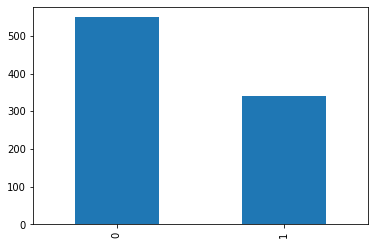

In [ ]:
titanic.Survived.value_counts().plot(kind="bar")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


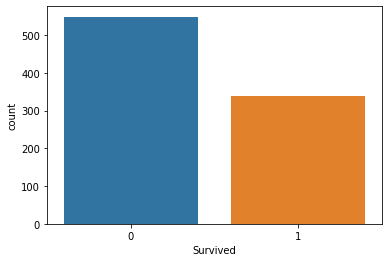

In [ ]:
sns.countplot('Survived', data=titanic)

In [ ]:
# Matplotlib : plusieurs lignes pour afficher un truc simple
#pandas : qui donne des paramètres par défaut et rend facile la visualisation
# seaborn : des graphes plus élégants et plus parlant

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


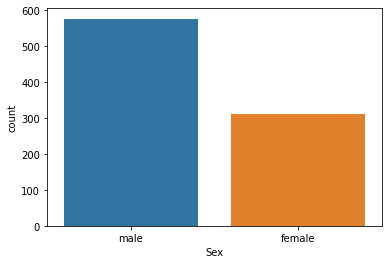

In [ ]:
sns.countplot('Sex', data=titanic)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


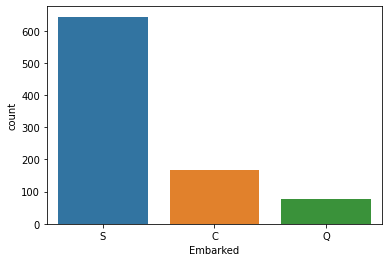

In [ ]:
sns.countplot('Embarked', data=titanic)

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


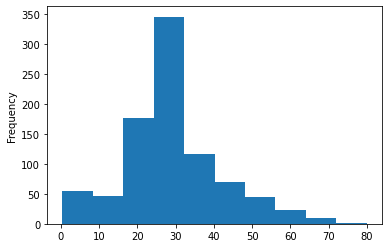

In [ ]:
titanic.Age.plot(kind='hist')

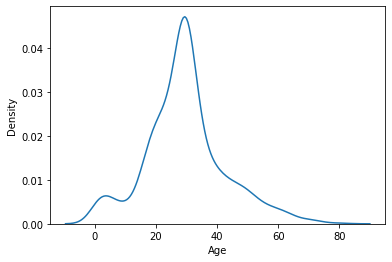

In [ ]:
sns.kdeplot(data=titanic, x="Age")

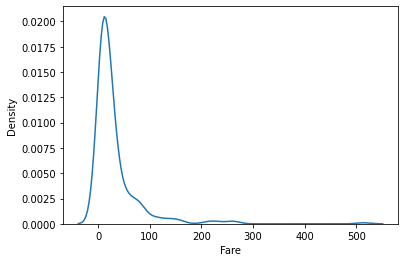

In [ ]:
sns.kdeplot(data=titanic, x="Fare")

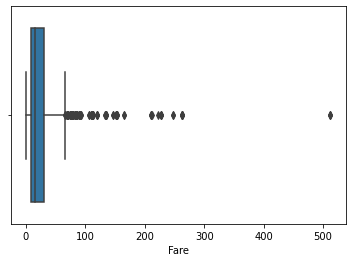

In [ ]:
sns.boxplot(x='Fare', data=titanic)

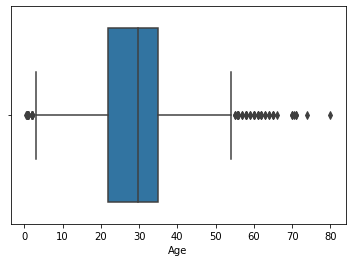

In [ ]:
sns.boxplot(x='Age', data=titanic)

In [ ]:
titanic[titanic['Age'] < 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
305,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
469,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C
644,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
755,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S
803,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C
831,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


# Analyse bivariée des colonnes afin d'identifier les caractéristiques ayant une influence sur la survie

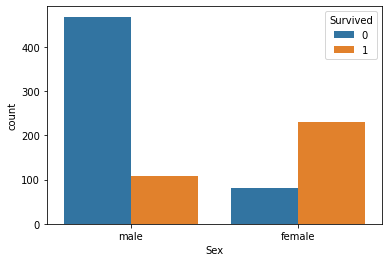

In [ ]:
sns.countplot(x='Sex', data=titanic, hue='Survived')

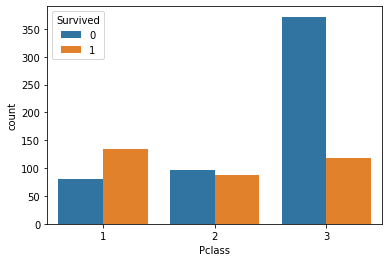

In [ ]:
sns.countplot(x='Pclass', data=titanic, hue='Survived')

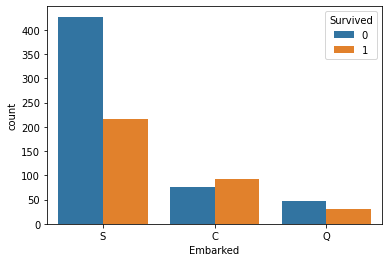

In [ ]:
sns.countplot(x='Embarked', data=titanic, hue='Survived')

In [ ]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [ ]:
titanic.Name.sample(8)

599    Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
618                     Becker, Miss. Marion Louise
369                   Aubart, Mme. Leontine Pauline
79                         Dowdell, Miss. Elizabeth
658                    Eitemiller, Mr. George Floyd
793                        Hoyt, Mr. William Fisher
814                      Tomlin, Mr. Ernest Portage
178                              Hale, Mr. Reginald
Name: Name, dtype: object

In [ ]:
# Plus jeune passager sans parent

In [ ]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [ ]:
titanic[titanic.Parch == 0].Age.min()

5.0

In [ ]:
titanic[titanic.Parch == 0].sort_values('Age')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
777,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,S
731,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,C
125,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,C
780,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,C
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
...,...,...,...,...,...,...,...,...,...,...
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


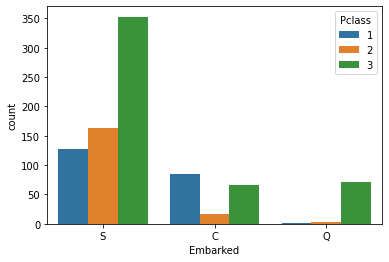

In [ ]:
sns.countplot(x='Embarked', data=titanic, hue='Pclass')

In [ ]:
#Age moyen des gens qui ont survécu

In [ ]:
titanic[titanic.Survived == 1].Age.mean()

28.423600346020766

In [ ]:
titanic[titanic.Survived == 0].Age.mean()

30.415099646415896

In [ ]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


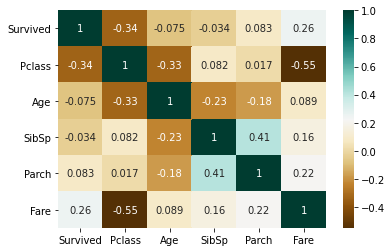

In [ ]:
sns.heatmap(titanic.corr(), annot=True, cmap="BrBG")

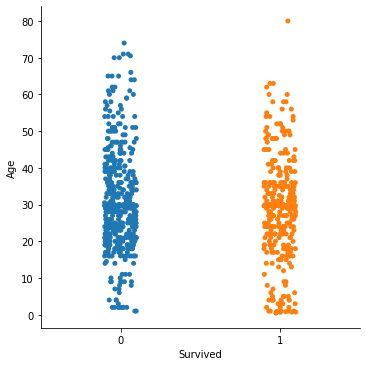

In [ ]:
sns.catplot(x="Survived", y="Age", data=titanic)

In [ ]:
    # Plus vieux survivant du titanic

In [ ]:
titanic[titanic.Survived == 1].sort_values('Age', ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,S
275,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,S
483,1,3,"Turkula, Mrs. (Hedwig)",female,63.00,0,0,4134,9.5875,S
570,1,2,"Harris, Mr. George",male,62.00,0,0,S.W./PP 752,10.5000,S
366,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.00,1,0,110813,75.2500,C
...,...,...,...,...,...,...,...,...,...,...
831,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S
469,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C
644,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
755,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S
